References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

## Basic Setup

In [64]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

# Shows the image immediately. 
# Resize option available.
# If you are using others' image, you can pass in a string parameter to cite the source.
def show_img(path, resize=None, source=None, source_scale=0.5):
    img = cv2.imread(path)
    if (resize != None):
        img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
    if(source != None):
        cite_source(img, source, scale=source_scale)
    cv2_imshow(img)

# Turns the path into an image object. Resize option available.
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

# Puts text of source on the image.
# Avoiding plagiarism and crediting others' hard work is important.
def cite_source(img, source, org=None, scale=0.7, color=1):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Take notes on a sticky note.
def take_notes(img, source, org, scale=None, color=1, thickness=1):
    if (org == None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * 0.9 )), int(np.ceil( img.shape[0] * 0.1 )) ),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=color, thickness=thickness)
    elif (org != None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * org[0] )), int(np.ceil( img.shape[0] * org[1] )) ),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=color, thickness=thickness)
    return img

def sticky_notes(notes):
    path = "/content/here/MyDrive/Math works/notes.png"    
    sticky_notes = get_img(path, resize=0.65)

    for i, note in enumerate(notes):
        sticky_notes = take_notes(sticky_notes, note, org=(1/17,(i+4)/11), scale=0.5)
    cv2_imshow(sticky_notes)

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


## Sticky notes for thoughts



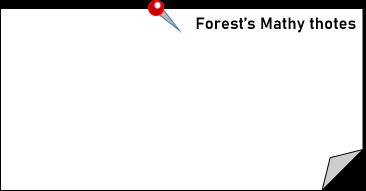

In [15]:
# display work
notes = ["",
         "",
         "",
         ""]

sticky_notes(notes)

# 4.1 Joint Probability Distribution
- Probability distributions can represent the probability of multiple random variables simultaneously.
- Probability both $x=x$ and $y=y$ is $P(x=x, y=y)$
- E.g.:
  - $P(flip 1= heads, flip 2= heads) = 0.25$
    - $\frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$
  - $P(card value=ace, card color =red) = \frac{2}{52} = \frac{1}{26} = 0.038$
    - This is $NOT$ $\frac{4}{52} \cdot \frac{26}{52}$ because it is a single event: draw a single card and it has to be an ace that is red.
  - $p(height=180-190cm, weight=20-30kg)=0$

# 4.2 Marginal Probability
In probability theory and statistics, the marginal distribution of a subset of a collection of random variables is the probability distribution of the variables contained in the subset. It gives the probabilities of various values of the variables in the subset without reference to the values of the other variables. This contrasts with a conditional distribution, which gives the probabilities contingent upon the values of the other variables.([Wikipedia](https://en.wikipedia.org/wiki/Marginal_distribution))

- Sum rule for discrete variables 
  - $\forall x \in x_1, P(x=x) = \sum_{y}P(x=x, y=y)$
    - for every x in in the set $X$,
    - the probability that the random variable ($x$) is going to equal to any of the particular event, 
    - is equal to the some of all the columns representing y

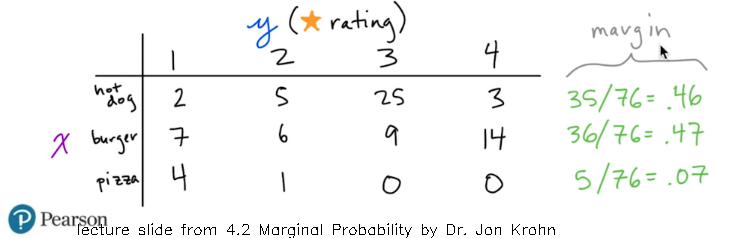

In [4]:
path = "/content/here/MyDrive/Math works/marginal probability.png"
img = get_img(path, resize=0.75)
img = cite_source(img, "lecture slide from 4.2 Marginal Probability by Dr. Jon Krohn", scale=0.5)
cv2_imshow(img)

Marginal probabilities of fastfood (above)  
(probability of chance, margin. Not marginal being peripheral)
- hotdog's margin = $\frac{35}{76} = .46$
- burger's margin = $\frac{36}{76} = .47$
- pizza's margin = $\frac{5}{76} = .07$

## Continuous variable integration

$$\rho(x) = \int\rho\cdot(x,y)\cdot \delta y$$

# 4.3 Conditional Probability
Probability of an outcome given another outcome occurred:
$$P(y=y | x=x) = \frac{P(y=y, x=x)}{P(x=x)}$$

- For an event $x$ that has already happened,
- compute the probability of $y$.
- $P(x=x) > 0$ because otherwise nothing to be conditional of.
  - Because then, the denominator $x$ becomes 0.

<br/>

Examples 1 (of independent events = with replacement):
- $P(flip 1=heads, flip2=heads) = 0.25$  
- $P(flip 2=heads | flip2=heads) = \frac{0.25}{0.5} = 0.5$  

<br/>

Examples 2 (of dependent events = without replacement):
- $P(card 1=ace, card 2=ace) = \frac{4}{52} \times \frac{3}{51} = \frac{12}{2652} = \frac{1}{221}$
- $P(card 1=ace, card 2=ace) = \frac{\frac{1}{221}}{\frac{4}{52}} = 0.059$


In [13]:
prob1 = ((4/52) * (3/51))/(4/52)
prob2 = 3/51

print(prob1, prob2)
print(prob1 == prob2)

0.058823529411764705 0.058823529411764705
True


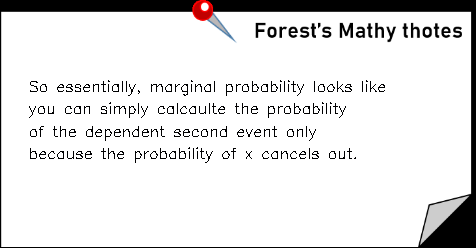

In [25]:
# display work
notes = ["So essentially, marginal probability looks like",
         "you can simply calcaulte the probability",
         "of the dependent second event only",
         "because the probability of x cancels out."]

sticky_notes(notes)




# 4.4 Exercises

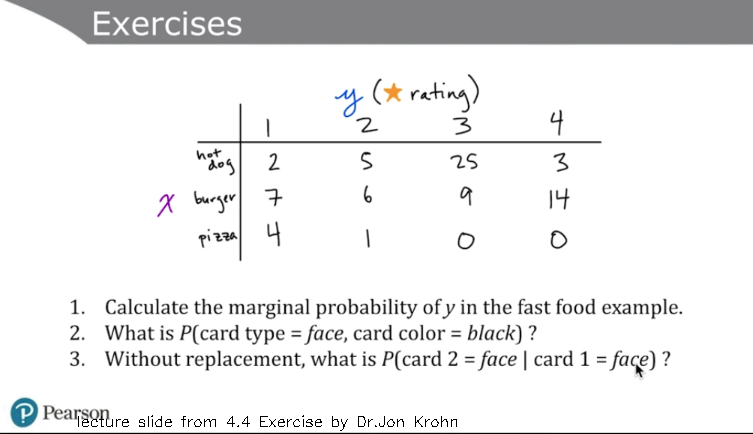

In [51]:
path = "/content/here/MyDrive/Math works/44exercise.png"
show_img(path, resize=0.75, source="lecture slide from 4.4 Exercise by Dr.Jon Krohn")

### Problem 1

In [40]:
# compute the ratings y 
fast_foods = np.array([[2, 5, 25, 3],
                       [7, 6, 9, 14],
                       [4, 1, 0, 0]])

total_count = sum(sum(fast_foods))

ratings1 = sum(fast_foods[:, 0])/total_count
ratings2 = sum(fast_foods[:, 1])/total_count
ratings3 = sum(fast_foods[:, 2])/total_count
ratings4 = sum(fast_foods[:, 3])/total_count

ratings1, ratings2, ratings3, ratings4

(0.17105263157894737,
 0.15789473684210525,
 0.4473684210526316,
 0.2236842105263158)

### Problem 2

In [41]:
face = 12/52
face_black = 6/52

face_black

0.11538461538461539

### Problem 3
WITHOUT replacement

In [59]:
card1_face = 12/52
card2_face = 11/51

np.round( ((card1_face * card2_face) / card1_face), 3)

0.216




# 4.5 Chain Rule of Probabilities


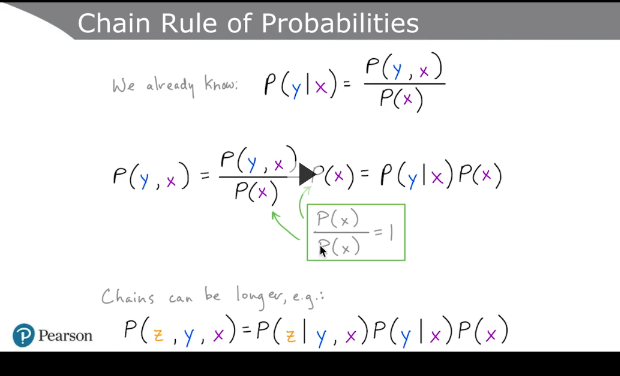

In [66]:
path = "/content/here/MyDrive/Math works/prob chain rule.png"
img = get_img(path, resize=0.6)
img = cite_source(img, "lectur eslide from 4.5 Chain Rule of Probabilities by Dr.Jon Krohn", scale=0.65, color=(255,255,255))
cv2_imshow(img)



# 4.6 Independent Random Variables

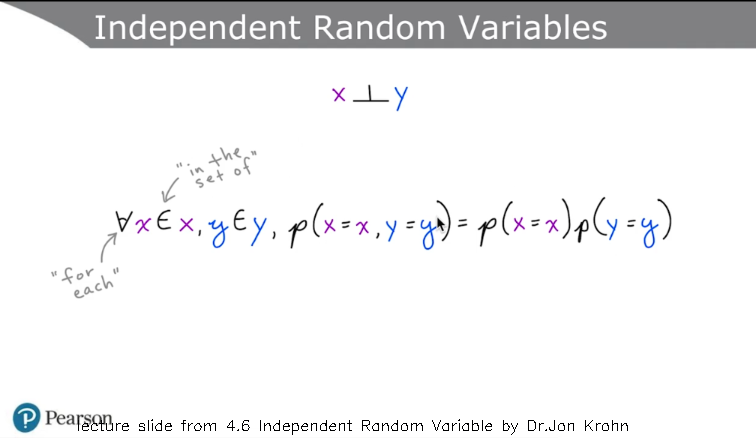

In [68]:
path = "/content/here/MyDrive/Math works/independent RV.png"
show_img(path, resize=0.75, source="lecture slide from 4.6 Independent Random Variable by Dr.Jon Krohn")

- For each of the possible states of $X$ $(\forall x)$ in the set of RV $X$ ($\in X$)
- As well as for all the possible states of $Y$ $(y\in Y)$
- the joint probability $p(x=x, y=y)$ of $x$ and $y$ occurring together:
- is equal to the probability that $x$ would occur ($p(x=x)$) multiplied by the probability that $y$ would occur ($p(y=y)$) 



# 4.7 Conditional Independence

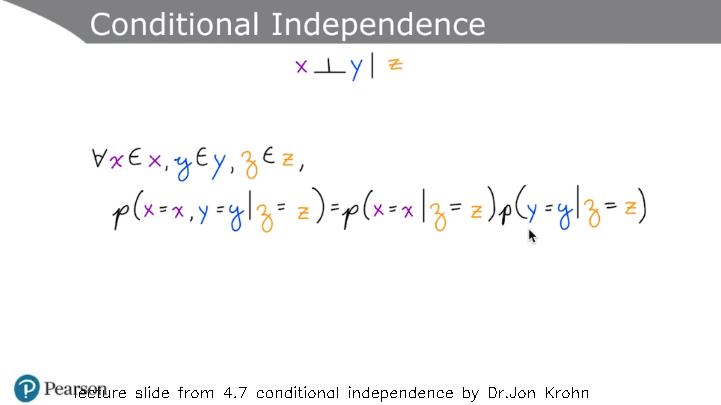

In [71]:
path = "/content/here/MyDrive/Math works/conditional independence.png"
show_img(path, resize=0.7, source="lecture slide from 4.7 conditional independence by Dr.Jon Krohn")

- $x$ and $y$ might be related to each other if $z$ is out of the picture.
- additional RV $z$
- we have a conditional independence IF:
  - the joint probability of $X$ and $Y$ given Z, conditional on $Z$,
    - is equal to the probability of the state $X$ given $Z$, multiplied by the probability of $Y$ given $Z$.

<br/>

Example: 
- Probability of throwing heads on two consecutive tosses ($X$ and $Y$), 
  - if two possible coins could be used: regular or two-headed ($Z$). 
- At Olympics: probability of wrestler winning gold ($X$) and weightlifter winning gold ($Y$), 
  - if both come from country with doping scandal ($Z$)
    - High likelihood that the athletes might be doped. If that's the case, the probabilities of $X$ and $Y$ will increase by the condition of $Z$.